<a href="https://colab.research.google.com/github/Jinukki/KJU/blob/master/Ch9_1(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# $Ch9.텍스트를 분류합니다 - 순환 신경망$

## 09-1 순차 데이터와 순환 신경망을 배웁니다.

> ### 순차 데이터를 소개합니다.
##### 우리가 다루는 데이터 중에는 독립적이지 않고 샘플 간 연관이 있는 경우가 많다.(날씨, 주가, 환율 등) 이러한 데이터들의 공통점은 시간 간격으로 배치되었다는 점이며, 이러한 데이터를 시계열(time series) 데이터라고 부른다. 시계열 데이터의 바탕에 깔려 있는 논리는 이전 시간의 데이터를 이용하여 미래의 데이터를 예측하는 것이다.

![1](https://user-images.githubusercontent.com/52277776/68989983-f5c71800-0890-11ea-846e-0464dcc8eefb.jpg)

##### 이렇게 순서가 있는 데이터를 일반적으로 순차 데이터(sequential data)라고 부른다.(텍스트, IOT센서 데이터, DNA염기서열 등) 다시 말해, 순차 데이터는 그 순서가 변경될 경우 고유의 특성을 잃어버리는 특징이 있다. 이 때 모델에서 순차 데이터를 처리하는 각 단계를 타임 스텝(time step)이라고 부른다.

<center>Hello Deep Learning</center>

##### 다음 그림은 완전 연결 신경망에 순차 데이터가 주입되는 모습이다.

![2](https://user-images.githubusercontent.com/52277776/68989984-f8c20880-0890-11ea-9340-d011e862b1ed.jpg)

##### 여기서 순서가 데이터를 처리하기 위해 개발된 것이 순환 신경망이다.
---
> ### 순환 신경망을 소개합니다.
##### 순환 신경망은 말 그대로 뉴런의 출력이 순환되는 신경망을 말한다. 다음 그림과 같은 구조를 가진다.

![3](https://user-images.githubusercontent.com/52277776/68989985-f9f33580-0890-11ea-81c1-da8e1972f1ca.jpg)

##### 순환 구조와 순환층이 존재한다. 은닉층에서 순환된 출력은 다음 입력을 처리할 때 현재 입력과 같이 사용된다. 즉, 이전 샘플의 정보를 현재 샘플 처리에 참조할 수 있고 이전 샘플을 고려한 현재 샘플 처리가 가능하다.

---

##### 순환 신경망에서는 층이나 뉴런을 셀(cell)이라 부른다. 순환 신경망에서는 셀의 출력을 은닉 상태(hidden state)라고 부른다. 다음은 입력을 x, 셀의 출력을  h라고 표시하여 나타낸 전형적인 순환층의 그림이다.

![4](https://user-images.githubusercontent.com/52277776/68990307-3759c200-0895-11ea-9c67-f61e5e87e151.jpg)

#####  이전 타임 스텝의 은닉 상태를 현재 은닉 상태 h와 구분하기 위해 h<sub>p</sub> 라고 표시한다.

![5](https://user-images.githubusercontent.com/52277776/68990310-3a54b280-0895-11ea-8673-4996d136ab87.jpg)

##### 아래 그림은 순환층의 셀에서 수행되는 계산을 나타낸 것으로 입력과 가중치, 은닉 상태는 행렬로 표기한다.

![6](https://user-images.githubusercontent.com/52277776/68990312-3de83980-0895-11ea-8061-71a80a2ab18e.jpg)

##### 입력 $X$와 이전 타임 스텝의 은닉 상태 $H~p~$에 곱해지는 2개의 가중치 $W~x~$와 $W~p~$ 그리고 절편 $b$를 함께 표시하였다. 또 순환 신경망의 셀에서는 활성화 함수로 하이퍼볼릭 탄젠트(hyperbolic tangent) 함수를 많이 사용하므로 은닉 상태 $H$를 계산하는 함수를 tanh로 표현하였다.

$$ tanh(x)=\frac{e^{x}-e^{-x}}{e^{x}+e^{-x}} $$

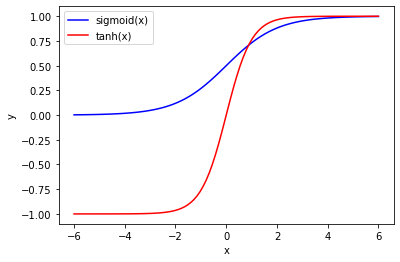

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-6, 6, 100)

def sigmoid(x):
  return 1/(1+np.exp(-x))

def tanh(x):
  return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

fig, ax = plt.subplots()

y1 = sigmoid(x)
y2 = tanh(x)

ax.plot(x, y1, color="blue", label="sigmoid(x)")
ax.plot(x, y2, color="red", label="tanh(x)")

ax.set_xlabel("x")
ax.set_ylabel("y")

ax.legend();

---

> ### 순환 신경망의 정방향 계산을 알아봅시다.
##### 순환 신경망의 정방향 계산을 정리하고 역방향 계산을 유도해 보자.

![7](https://user-images.githubusercontent.com/52277776/68990316-43de1a80-0895-11ea-900c-b6ca9852f886.jpg)

##### 위 신경망은 이진분류를 가정했으므로 출력층의 활성화 함수로 시그모이드 함수를 사용하였다.

##### 각 층의 정방향 계산에 필요한 입력과 가중치의 구조를 알아보자. 입력데이터 $X$의 크기는 ($m$,$n_f$)이다. $m$은 샘플 개수, $n_f$는 특성 개수이다.

![8](https://user-images.githubusercontent.com/52277776/68992872-b1e60a00-08b4-11ea-82e9-913451ed0730.jpg)

##### 입력에 곱해지는 가중치 $W_{1x}$의 크기는 ($n_f$,$n_c$)이다. 여기서 $n_c$는 순환층에 있는 셀 개수이다.

![9](https://user-images.githubusercontent.com/52277776/68992874-b5799100-08b4-11ea-806c-3d17de38d406.jpg)

<center>$ XW_{1x}=(m,n_f )\cdot(n_f,n_c)=(m,n_c)$</center>

##### $XW_{1x}$의 크기가 $(m,n_c)$이므로 $Z_1$과 $H$ 그리고 이전 은닉 상태인 $H_p$의 크기도 $(m,n_c)$가 된다. 이를 통해 $H_p$와 곱해지는 가중치 $W_{1h}$의 크기가 ($n_c$,$n_c$)가 되어야 한다는 것을 알 수 있다.

<center>$ H_{p}W_{1h}=(m,n_c)\cdot(n_c,n_c)=(m,n_c)$</center>

##### 출력층으로 전달되는 $H$의 크기가 $(m,n_c)$이므로 이와 곱해지는 가중치 $W_2$의 크기는 ($n_c$,n_classes)이다. 따라서 $Z_2$와 $A_2$의 크기는 ($m$,n_classes)이다. 이 장에서는 이진 분류를 다루므로 n_classes의 크기는 1이다.

<center>$ HW_2=(m,n_c)\cdot(n_c,1)=(m,1)$</center>

##### 각 층의 뉴런마다 절편이 하나씩 필요하므로 $b_1$의 크기는 ($n_c$,1)이고 $b_2$의 크기는 (n_classes,)이다. 